<h1><b> Ocular Disease Recognition </b></h1>

<b>Dataset link:-</b> https://www.kaggle.com/andrewmvd/ocular-disease-recognition-odir5k

Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

<b>Data format:-</b>

- ODIR-5K (folder)- Contains Training and Test folder for the images.
- Preprocessed_images (folder)- Contains pictures of left and right eye
- full_df.csv - Contains information about the images and filenames 

<b>Dataset column interpretation:- </b>

The dataset has 19 columns with most of the columns self-explanatory except the binary disease columns named with initials of diseases. Here is the expalantion of that:-

Normal (N),
Diabetes (D),
Glaucoma (G),
Cataract (C),
Age related Macular Degeneration (A),
Hypertension (H),
Pathological Myopia (M),
Other diseases/abnormalities (O)

#Data preparation

In [ ]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!unzip eyes_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: preprocessed_images/2179_right.jpg  
  inflating: preprocessed_images/217_left.jpg  
  inflating: preprocessed_images/217_right.jpg  
  inflating: preprocessed_images/2180_left.jpg  
  inflating: preprocessed_images/2180_right.jpg  
  inflating: preprocessed_images/2181_left.jpg  
  inflating: preprocessed_images/2181_right.jpg  
  inflating: preprocessed_images/2182_left.jpg  
  inflating: preprocessed_images/2182_right.jpg  
  inflating: preprocessed_images/2183_left.jpg  
  inflating: preprocessed_images/2183_right.jpg  
  inflating: preprocessed_images/2184_left.jpg  
  inflating: preprocessed_images/2184_right.jpg  
  inflating: preprocessed_images/2185_left.jpg  
  inflating: preprocessed_images/2185_right.jpg  
  inflating: preprocessed_images/2187_left.jpg  
  inflating: preprocessed_images/2187_right.jpg  
  inflating: preprocessed_images/2189_left.jpg  
  inflating: preprocessed_images/2189_right.jpg  
  inflatin

In [ ]:
df = pd.read_excel('ODIR-5K/ODIR-5K/data.xlsx')

In [ ]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
3496,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3497,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
3498,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [ ]:
im = os.listdir('./preprocessed_images/')

In [ ]:
for t in range(len(df)):
     if df['Left-Fundus'][t] not in im:
          df.drop([t], axis=0, inplace=True)

In [ ]:
len(df), len(im)

(3198, 6392)

In [ ]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
5,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
3496,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3497,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
3498,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [ ]:
df['cataract'] = df['Left-Diagnostic Keywords'].apply(lambda x: 'cat' if 'cataract' in x else 'not_cat')

In [ ]:
df = df.reset_index(drop=True)

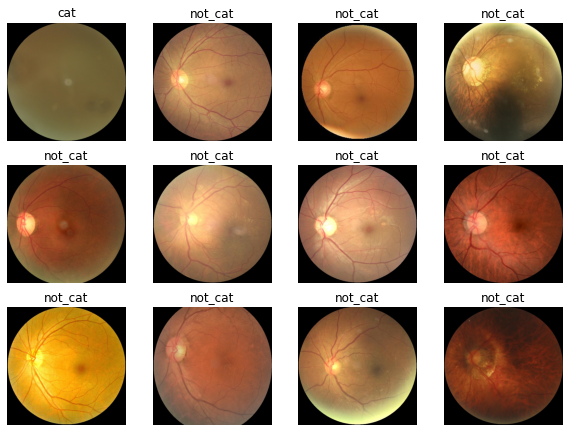

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(0,12):
        ax = plt.subplot(4, 4, i + 1)
        img = plt.imread(os.path.join('./preprocessed_images', df['Left-Fundus'][i]))
        plt.imshow(img, cmap=plt.get_cmap('gray'))
        plt.title(df['cataract'][i])
        plt.axis("off")

#Value counts of diseases

Text(0.5, 0, '0: Normal, 1: Not Normal')

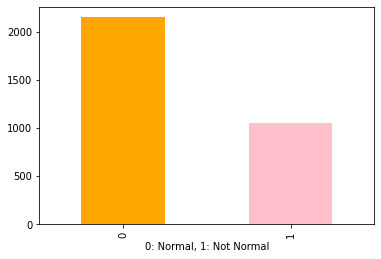

In [ ]:
df['N'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Normal, 1: Not Normal')

Text(0.5, 0, '0: Not Diabetes, 1: Diabetes')

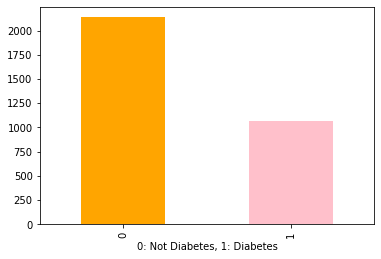

In [ ]:
df['D'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Diabetes, 1: Diabetes')

Text(0.5, 0, '0: Not Glaucoma, 1: Glaucoma')

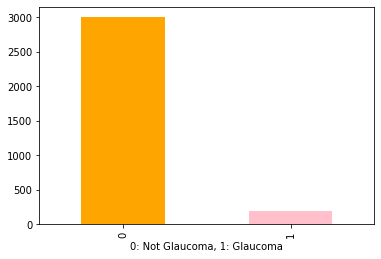

In [ ]:
df['G'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Glaucoma, 1: Glaucoma')

Text(0.5, 0, '0: Not Cataract, 1: Cataract')

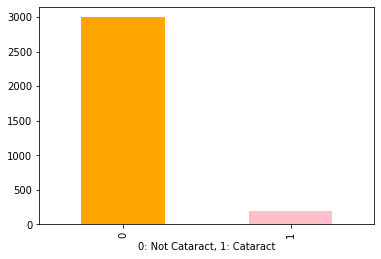

In [ ]:
df['C'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Cataract, 1: Cataract')

Text(0.5, 0, '0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

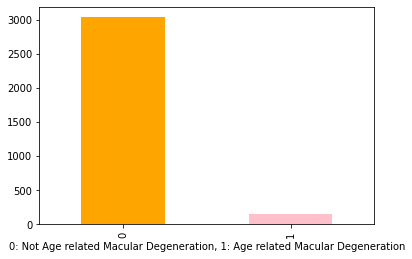

In [ ]:
df['A'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

Text(0.5, 0, '0: Not Hypertension, 1: Hypertension')

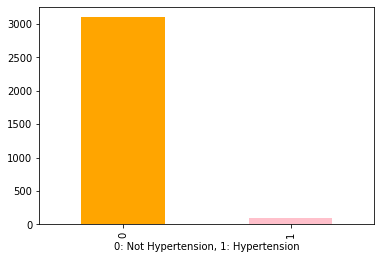

In [ ]:
df['H'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Hypertension, 1: Hypertension')

Text(0.5, 0, '0: Not Pathological Myopia, 1: Pathological Myopia')

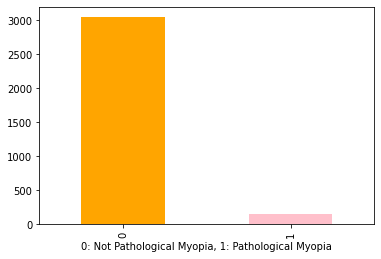

In [ ]:
df['M'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Pathological Myopia, 1: Pathological Myopia')

Text(0.5, 0, '0: Not other abnormality, 1:  other abnormality')

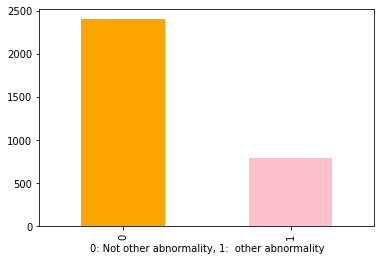

In [ ]:
df['O'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not other abnormality, 1:  other abnormality')

#Patients sex distribution

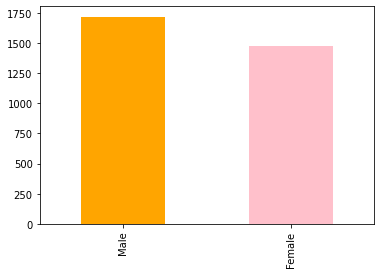

In [ ]:
df['Patient Sex'].value_counts().plot.bar(color=['orange','pink'])

#Patients with age more than 50

Text(0.5, 0, '0: Normal, 1: Not Normal')

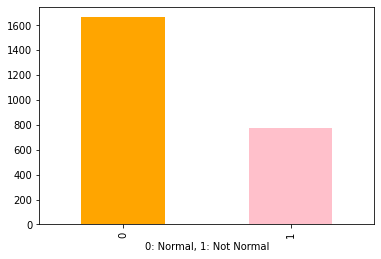

In [ ]:
df.loc[df['Patient Age'] > 50]['N'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Normal, 1: Not Normal')

Text(0.5, 0, '0: Not Diabetes, 1: Diabetes')

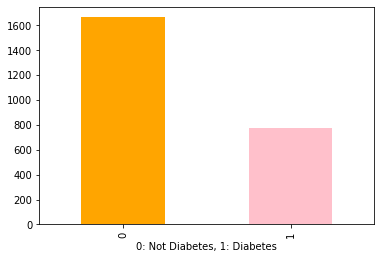

In [ ]:
df.loc[df['Patient Age'] > 50]['D'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Diabetes, 1: Diabetes')

Text(0.5, 0, '0: Not Glaucoma, 1: Glaucoma')

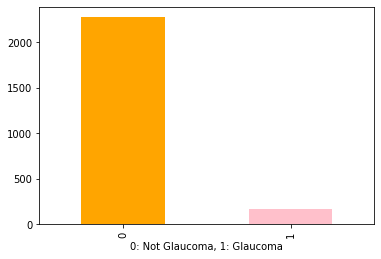

In [ ]:
df.loc[df['Patient Age'] > 50]['G'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Glaucoma, 1: Glaucoma')

Text(0.5, 0, '0: Not Cataract, 1: Cataract')

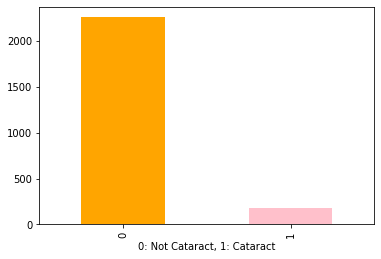

In [ ]:
df.loc[df['Patient Age'] > 50]['C'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Cataract, 1: Cataract')

Text(0.5, 0, '0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

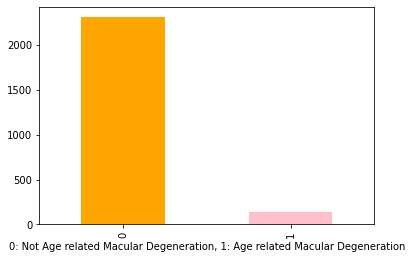

In [ ]:
df.loc[df['Patient Age'] > 50]['A'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

Text(0.5, 0, '0: Not Hypertension, 1: Hypertension')

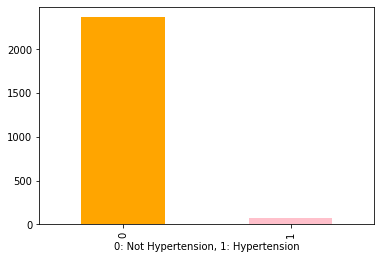

In [ ]:
df.loc[df['Patient Age'] > 50]['H'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Hypertension, 1: Hypertension')

Text(0.5, 0, '0: Not Pathological Myopia, 1: Pathological Myopia')

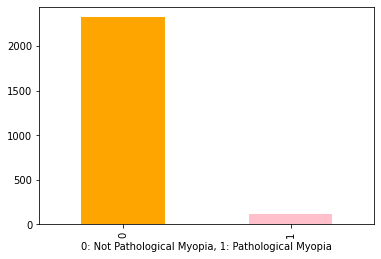

In [ ]:
df.loc[df['Patient Age'] > 50]['M'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Pathological Myopia, 1: Pathological Myopia')

Text(0.5, 0, '0: Not other abnormality, 1:  other abnormality')

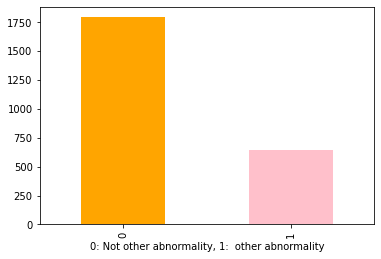

In [ ]:
df.loc[df['Patient Age'] > 50]['O'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not other abnormality, 1:  other abnormality')

#Patients with age less than 50

Text(0.5, 0, '0: Normal, 1: Not Normal')

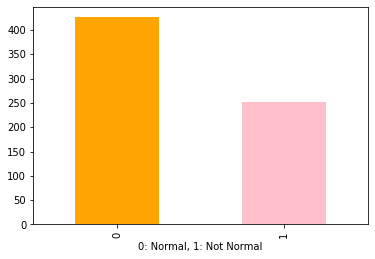

In [ ]:
df.loc[df['Patient Age'] < 50]['N'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Normal, 1: Not Normal')

Text(0.5, 0, '0: Not Diabetes, 1: Diabetes')

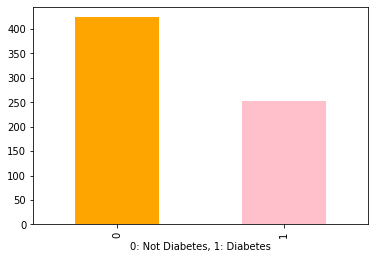

In [ ]:
df.loc[df['Patient Age'] < 50]['D'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Diabetes, 1: Diabetes')

Text(0.5, 0, '0: Not Glaucoma, 1: Glaucoma')

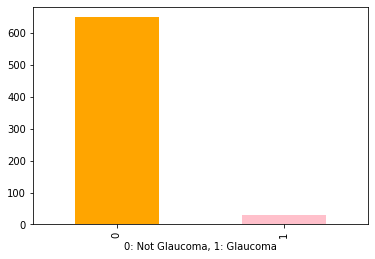

In [ ]:
df.loc[df['Patient Age'] < 50]['G'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Glaucoma, 1: Glaucoma')

Text(0.5, 0, '0: Not Cataract, 1: Cataract')

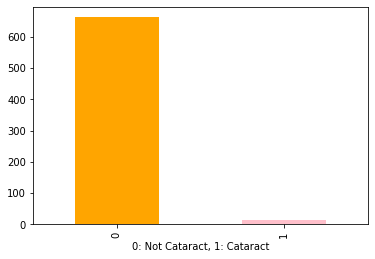

In [ ]:
df.loc[df['Patient Age'] < 50]['C'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Cataract, 1: Cataract')

Text(0.5, 0, '0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

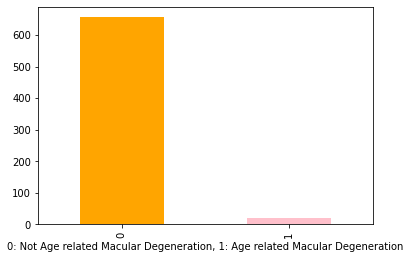

In [ ]:
df.loc[df['Patient Age'] < 50]['A'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

Text(0.5, 0, '0: Not Hypertension, 1: Hypertension')

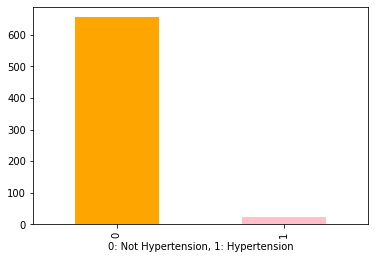

In [ ]:
df.loc[df['Patient Age'] < 50]['H'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Hypertension, 1: Hypertension')

Text(0.5, 0, '0: Not Pathological Myopia, 1: Pathological Myopia')

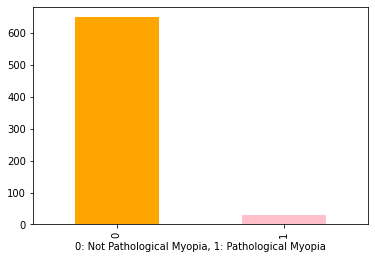

In [ ]:
df.loc[df['Patient Age'] < 50]['M'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Pathological Myopia, 1: Pathological Myopia')

Text(0.5, 0, '0: Not other abnormality, 1:  other abnormality')

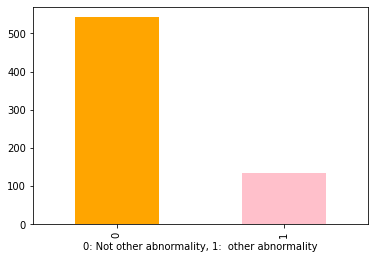

In [ ]:
df.loc[df['Patient Age'] < 50]['O'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not other abnormality, 1:  other abnormality')

#Patients with age more than 50 and Male

Text(0.5, 0, '0: Normal, 1: Not Normal')

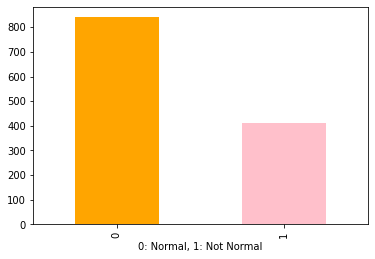

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Male')]['N'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Normal, 1: Not Normal')

Text(0.5, 0, '0: Not Diabetes, 1: Diabetes')

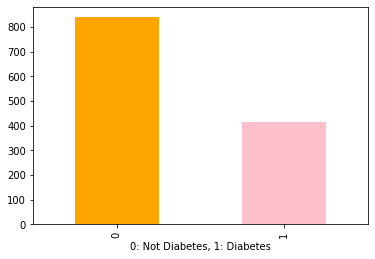

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Male')]['D'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Diabetes, 1: Diabetes')

Text(0.5, 0, '0: Not Glaucoma, 1: Glaucoma')

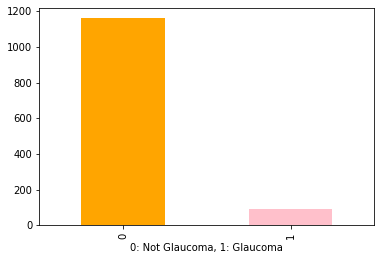

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Male')]['G'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Glaucoma, 1: Glaucoma')

Text(0.5, 0, '0: Not Cataract, 1: Cataract')

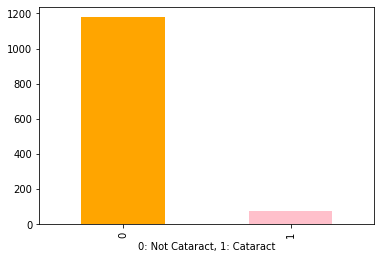

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Male')]['C'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Cataract, 1: Cataract')

Text(0.5, 0, '0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

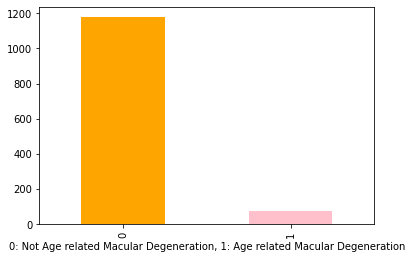

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Male')]['A'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

Text(0.5, 0, '0: Not Hypertension, 1: Hypertension')

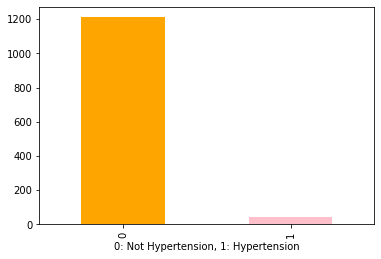

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Male')]['H'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Hypertension, 1: Hypertension')

Text(0.5, 0, '0: Not Pathological Myopia, 1: Pathological Myopia')

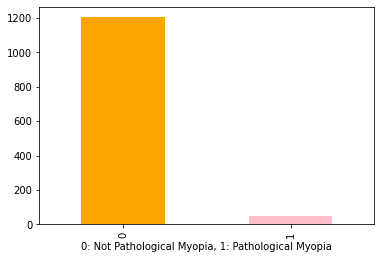

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Male')]['M'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Pathological Myopia, 1: Pathological Myopia')

Text(0.5, 0, '0: Not other abnormality, 1:  other abnormality')

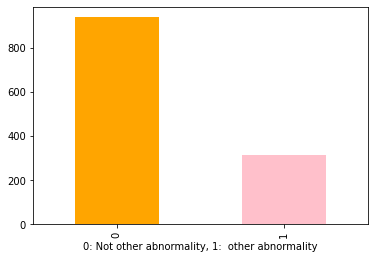

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Male')]['O'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not other abnormality, 1:  other abnormality')

#Patients with age less than 50 and Male

Text(0.5, 0, '0: Normal, 1: Not Normal')

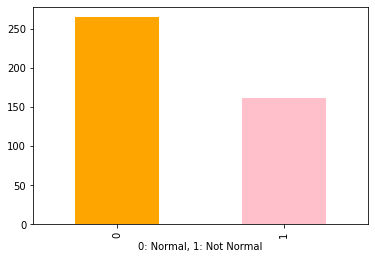

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Male')]['N'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Normal, 1: Not Normal')

Text(0.5, 0, '0: Not Diabetes, 1: Diabetes')

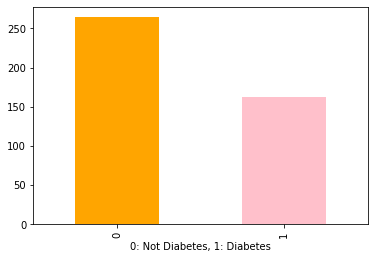

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Male')]['D'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Diabetes, 1: Diabetes')

Text(0.5, 0, '0: Not Glaucoma, 1: Glaucoma')

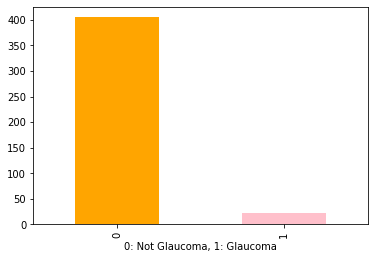

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Male')]['G'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Glaucoma, 1: Glaucoma')

Text(0.5, 0, '0: Not Cataract, 1: Cataract')

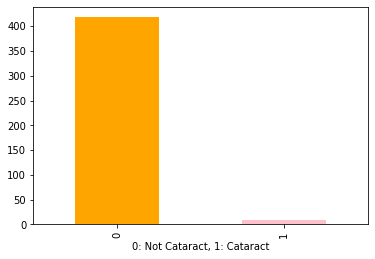

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Male')]['C'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Cataract, 1: Cataract')

Text(0.5, 0, '0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

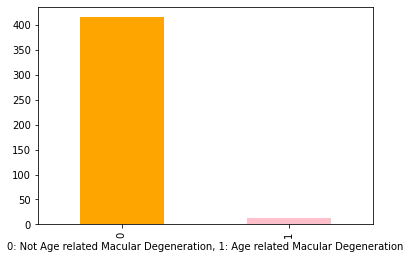

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Male')]['A'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

Text(0.5, 0, '0: Not Hypertension, 1: Hypertension')

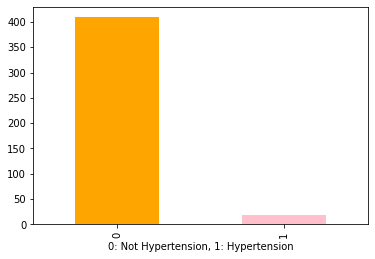

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Male')]['H'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Hypertension, 1: Hypertension')

Text(0.5, 0, '0: Not Pathological Myopia, 1: Pathological Myopia')

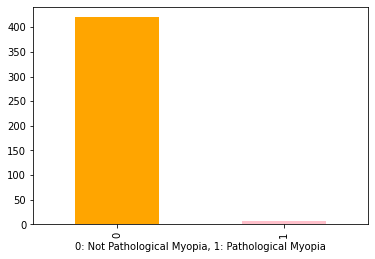

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Male')]['M'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Pathological Myopia, 1: Pathological Myopia')

Text(0.5, 0, '0: Not other abnormality, 1:  other abnormality')

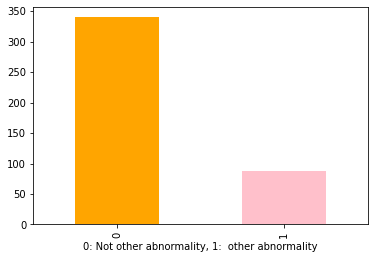

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Male')]['O'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not other abnormality, 1:  other abnormality')

#Patients with age more than 50 and Female

Text(0.5, 0, '0: Normal, 1: Not Normal')

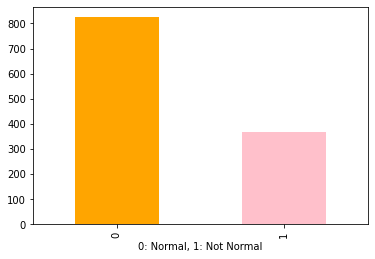

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Female')]['N'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Normal, 1: Not Normal')

Text(0.5, 0, '0: Not Diabetes, 1: Diabetes')

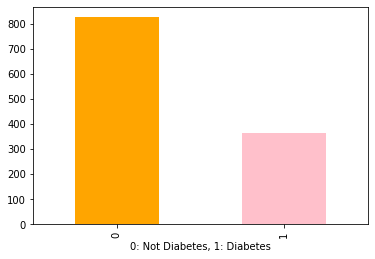

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Female')]['D'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Diabetes, 1: Diabetes')

Text(0.5, 0, '0: Not Glaucoma, 1: Glaucoma')

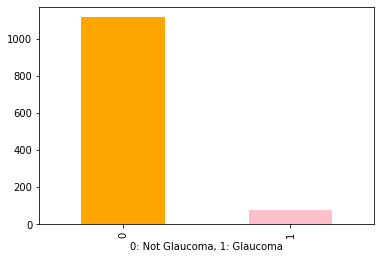

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Female')]['G'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Glaucoma, 1: Glaucoma')

Text(0.5, 0, '0: Not Cataract, 1: Cataract')

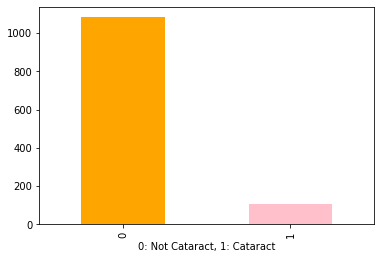

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Female')]['C'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Cataract, 1: Cataract')

Text(0.5, 0, '0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

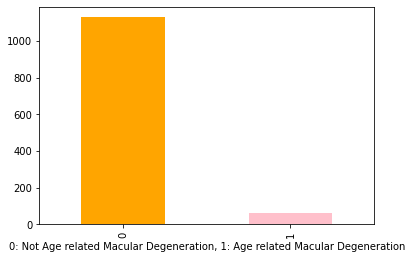

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Female')]['A'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

Text(0.5, 0, '0: Not Hypertension, 1: Hypertension')

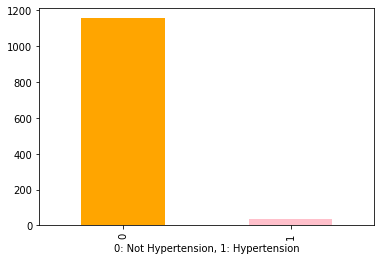

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Female')]['H'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Hypertension, 1: Hypertension')

Text(0.5, 0, '0: Not Pathological Myopia, 1: Pathological Myopia')

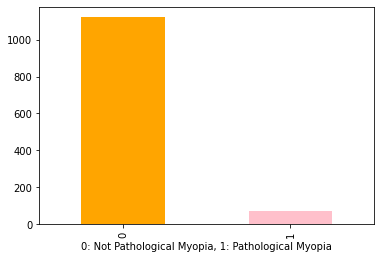

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Female')]['M'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Pathological Myopia, 1: Pathological Myopia')

Text(0.5, 0, '0: Not other abnormality, 1:  other abnormality')

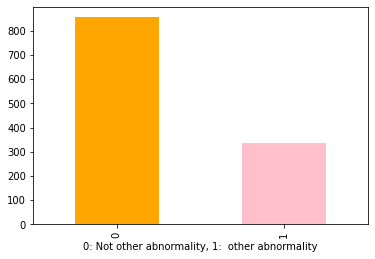

In [ ]:
df[(df['Patient Age'] > 50) & (df['Patient Sex'] == 'Female')]['O'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not other abnormality, 1:  other abnormality')

#Patients with age less than 50 and Female

Text(0.5, 0, '0: Normal, 1: Not Normal')

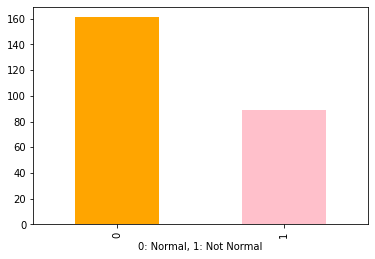

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Female')]['N'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Normal, 1: Not Normal')

Text(0.5, 0, '0: Not Diabetes, 1: Diabetes')

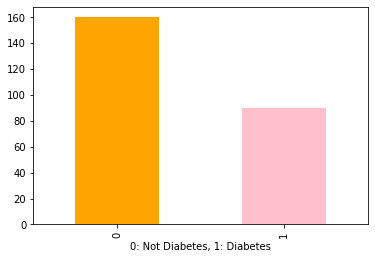

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Female')]['D'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Diabetes, 1: Diabetes')

Text(0.5, 0, '0: Not Glaucoma, 1: Glaucoma')

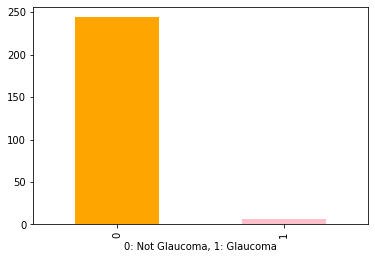

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Female')]['G'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Glaucoma, 1: Glaucoma')

Text(0.5, 0, '0: Not Cataract, 1: Cataract')

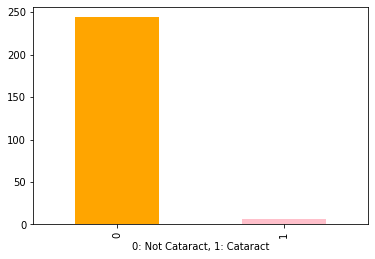

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Female')]['C'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Cataract, 1: Cataract')

Text(0.5, 0, '0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

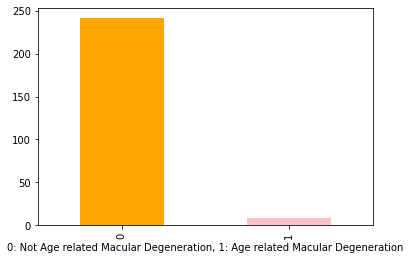

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Female')]['A'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Age related Macular Degeneration, 1: Age related Macular Degeneration')

Text(0.5, 0, '0: Not Hypertension, 1: Hypertension')

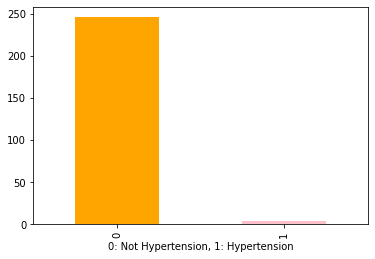

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Female')]['H'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Hypertension, 1: Hypertension')

Text(0.5, 0, '0: Not Pathological Myopia, 1: Pathological Myopia')

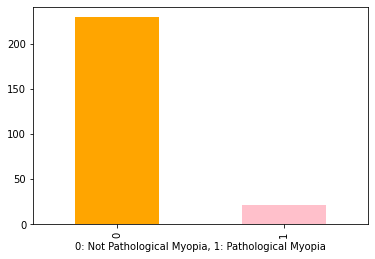

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Female')]['M'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not Pathological Myopia, 1: Pathological Myopia')

Text(0.5, 0, '0: Not other abnormality, 1:  other abnormality')

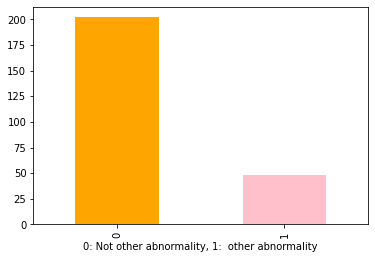

In [ ]:
df[(df['Patient Age'] < 50) & (df['Patient Sex'] == 'Female')]['O'].value_counts().plot.bar(color=['orange','pink'])
plt.xlabel('0: Not other abnormality, 1:  other abnormality')